<a href="https://colab.research.google.com/github/qonca/traditional_ml/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris (as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit (X_iris, y_iris)
tree_clf.score(X_iris, y_iris)

0.96

In [ ]:
import pandas as pd

In [ ]:
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


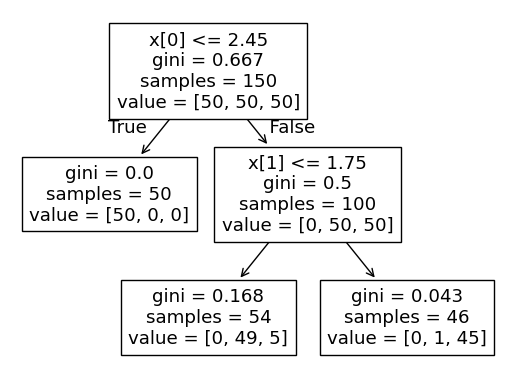

In [ ]:
tree.plot_tree(tree_clf);

In [ ]:
tree_clf.predict_proba([[3,5]]).round(3)

array([[0.   , 0.022, 0.978]])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(n_samples = 100, noise = 0.2, random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 42)
tree_clf1.fit (X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
tree_clf1.score(X_moons, y_moons), tree_clf2.score(X_moons, y_moons)

(1.0, 0.97)

#DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 +0.025 *np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor (max_depth = 2, random_state = 42)
tree_reg.fit(X_quad, y_quad)
tree_reg.score(X_quad, y_quad)

0.7966018355059642

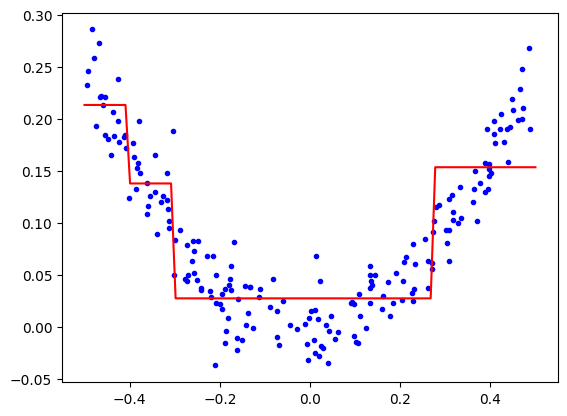

In [ ]:
import matplotlib.pyplot as plt

X_new = np.linspace (-0.5, 0.5, 100).reshape(-1, 1)
y_pred = tree_reg.predict(X_new)

plt.plot(X_quad, y_quad, "b.")
plt.plot(X_new, y_pred, 'r-')

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons, y_moons = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state = 42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state= 42)
# dt_clf.fit(X_train, y_train)

In [ ]:
# dt_clf.score(X_test, y_test)

In [ ]:
X_train.shape

(7500, 2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [4,5,6,7,8,9],
    'min_samples_split': [5,10,15,20,25],

}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 10, 15, 20, 25]})

In [ ]:
c = grid.best_params_
c

{'max_depth': 6, 'min_samples_split': 25}

In [ ]:
grid.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=25)

In [ ]:
grid.score(X_test, y_test)

0.8628